In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests

### Computer Vision and Convolutional Neurla Networks



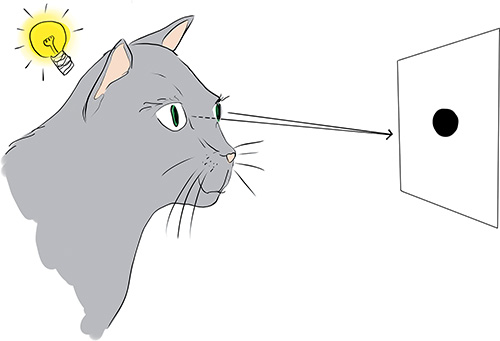

#### Biological Vision
While The Nobel Prize-winning neurophysiologists Torsten Wiesel and David Hubel where trying to understand how the primary visual cortex in mammels responds to visual input the results where dishearting. No matter what an image they where prjecting to a cat the primary neurons where not activating. However while they where changing the slides the neuron activated. It turns out some neurons activate for only a specific shapes (This was importent discovery though it doesnt tell the entire [story](https://scitechdaily.com/visual-neurons-dont-work-the-way-scientists-thought-much-more-complicated/)).

As shown in Figure below, Hubel and Wiesel determined that a given simple neuron responds optimally to an edge at a particular, specific orientation. A large group of simple neurons, with each specialized to detect a particular edge orientation, together is able to represent all 360 degrees of orientation. These edge-orientation detecting simple cells then pass along information to a large number of so-called complex neurons. A given complex neuron receives visual information that has already been processed by several simple cells, so it is well positioned to recombine multiple line orientations into a more complex shape like a corner or a curve.

The goal of this story is not talk about history but to introduce the concept of building a herarchy of visual concepts each of which depends on less abstract ones. It is noteworthy to mention that such understanding of neural visual system inspired later the proposal of what we know now as convolutional neural networks. Read "Deep Learning Illustrated: A Visual, Interactive Guide to Artificial Intelligence" for more details.



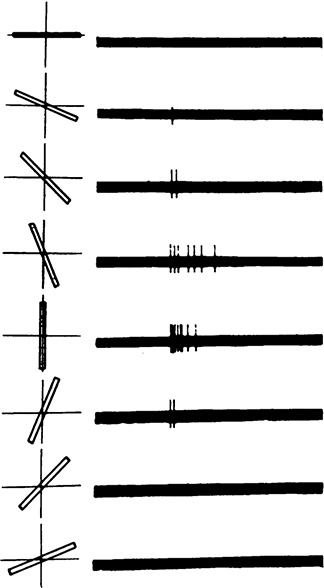
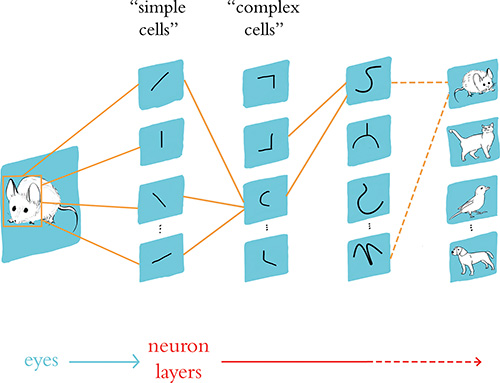

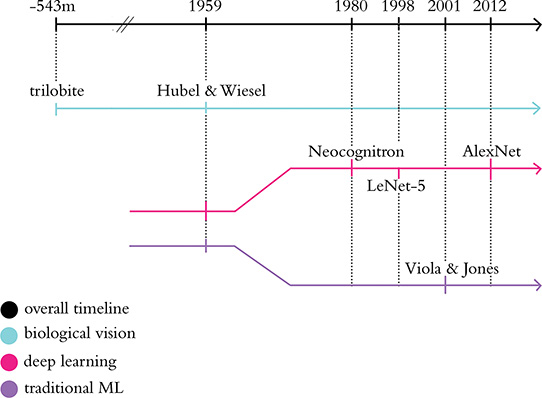

### Traditional Computer Vision

Although both traditional and neural based machine learning approaches depends on abstract features. We mean by abstract features ones that are of higer abstraction from raw pixels - feeding raw pixels to traditional machine learning to detect objects is not efficent - thus we depend on higher abstract features processed from raw pixels such as edges and curves and so on. The key difference between neural based and traditional machine learning approaches that those features where manually engineered by TML researchers while they are automtically learned by neurons. Now the question is for TML, is how to transform raw pixel into meanigful abstract features.

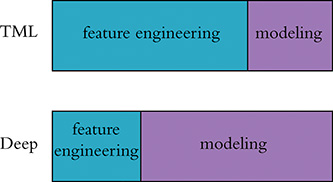

#### Viola and Jones 

To make clear what feature engineering is, the below figure provides a celebrated example from Paul Viola and Michael Jones in the early 2000s.Viola and Jones employed rectangular filters such as the vertical or horizontal black-and-white bars shown in the figure. Features generated by passing these filters over an image can be fed into machine learning algorithms to reliably detect the presence of a face. This work is notable because the algorithm was efficient enough to be the first real-time face detector outside the realm of biology.

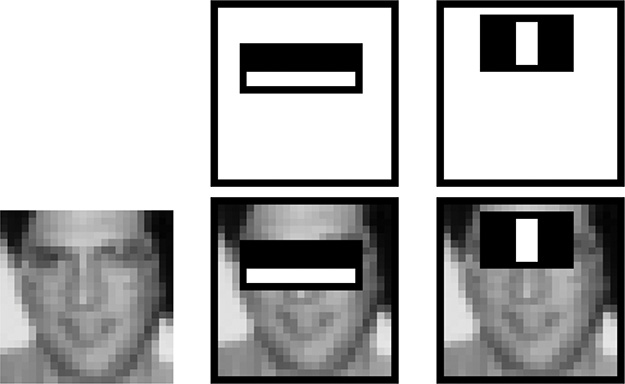

#### What the heck are Filters?

Fitlers are simple prototypical visual concepts that are passed over images and responds when the image have a simlar concept to theirs. Like the horizantl edge detector and the line detector. While there is multiple ways to figure if the image and the filter are similar we will be onsidering convolution operation. The below [figure](https://towardsdatascience.com/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning-669281e58215) illustrates a convolution operation. The 3x3 filter is passed over the 5x5 image like a sliding window. At each stop the values in both in the image and in the filter are multiplied pointwise and the summed outputting a single value. This value represents how much  this region of the image reseambles the fitler.

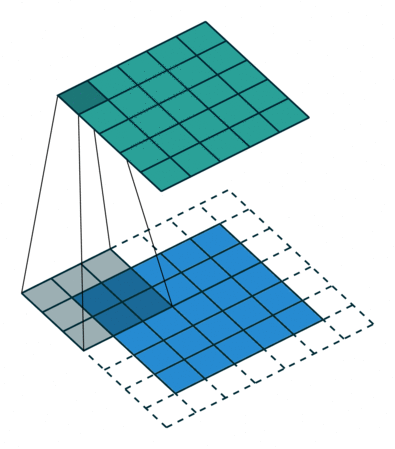

In [18]:
# Dummy Convolution Example
filter = np.array([[-1, 1],
                   [-1, 1]])
image = np.array([[20, 120, 22, 45],
                  [12, 56, 230, 150],
                  [180, 244, 244, 233],
                  [230, 120, 34, 23]])

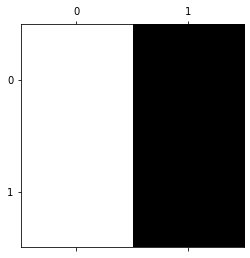

In [19]:
plt.matshow(filter, cmap="Greys")

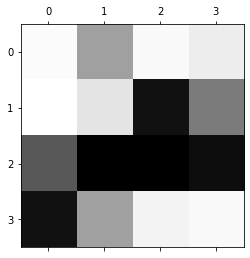

In [20]:
plt.matshow(image, cmap="Greys")

In [21]:
# Convolution
result = np.array([
[np.sum(filter*image[0:2, 0:2]), np.sum(filter*image[2:4, 0:2])],
[np.sum(filter*image[2:4, 0:2]), np.sum(filter*image[2:4, 2:4])]
])

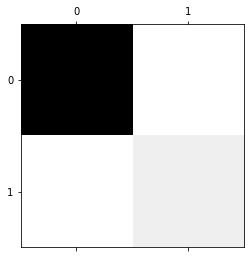

In [24]:
plt.matshow(result, cmap="Greys")

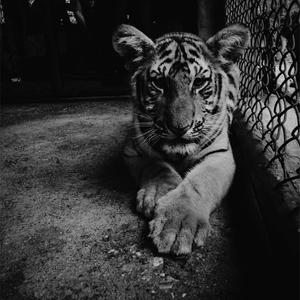

In [30]:
url = "https://picsum.photos/300/300?grayscale"
im = Image.open(requests.get(url, stream=True).raw)
im

In [40]:
np.array(im)

array([[53,  1,  5, ..., 28, 68, 95],
       [50, 11, 11, ..., 17, 49, 75],
       [36, 15, 13, ...,  9, 33, 61],
       ...,
       [20, 22, 15, ...,  5,  7, 13],
       [20, 25, 21, ...,  5,  7, 13],
       [21, 31, 29, ...,  5,  7, 13]], dtype=uint8)

In [52]:
filter_1 = np.array([[-1, 1, 0],
                     [-1, 1, 0],
                     [-1, 1, 0]])
filter_2 = filter_1.transpose()

In [37]:
#On Real Images
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

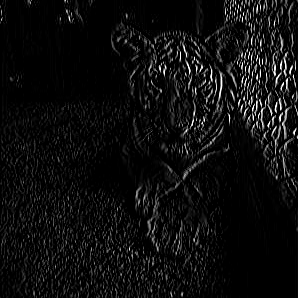

In [48]:
horizantal_im = Image.fromarray(convolution2d(np.array(im), filter_1)).convert("L")
horizantal_im

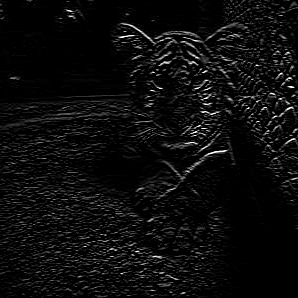

In [53]:
vertical_im = Image.fromarray(convolution2d(np.array(im), filter_2)).convert("L")
vertical_im

By combining the output of multiple filters we get what is come to be called a feature map. The feature map summarises what are the available features in each region. By using features and not raw pixels traditional machine learning models can now be more efficient. 

### Convolutional Neural Network

### Hands-on Keras